In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fe-syll/hasil_fe_syll.csv


In [2]:
syll_dataset = pd.read_csv('/kaggle/input/fe-syll/hasil_fe_syll.csv')

In [3]:
syll_dataset.head(4)

,grade,text,cvc_density,v_density,cv_density,vc_density,rasio_konsonan,unique_syll
0,1,diskusikan gambar sampul di atas dengan menjaw...,0.631579,0.225806,1.714286,0.583333,0.631579,17
1,1,pernahkah kalian mendengar suara duk duk,0.608696,0.209302,1.555556,0.642857,0.608696,16
2,1,biasanya apa yang berbunyi duk duk,0.636364,0.173913,1.750000,0.571429,0.636364,12
3,1,apa yang kalian lihat pada gambar di atas,0.636364,0.210526,1.750000,0.571429,0.636364,14


/tmp/ipykernel_20/2952693066.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = syll_dataset.corr()


<Axes: >

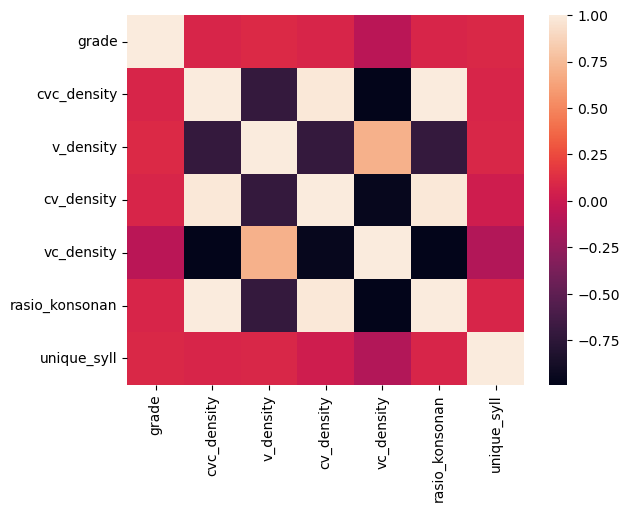

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
corr_df = syll_dataset.corr()
sns.heatmap(corr_df)

In [5]:
y = syll_dataset[['grade']]
X = syll_dataset.drop('grade', axis=1)
X = X.drop('text', axis=1)
X.head()


,cvc_density,v_density,cv_density,vc_density,rasio_konsonan,unique_syll
0,0.631579,0.225806,1.714286,0.583333,0.631579,17
1,0.608696,0.209302,1.555556,0.642857,0.608696,16
2,0.636364,0.173913,1.750000,0.571429,0.636364,12
3,0.636364,0.210526,1.750000,0.571429,0.636364,14
4,0.444444,0.294118,0.800000,1.250000,0.444444,12


In [6]:
y.head(2)

,grade
0,1
1,1


In [7]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='auto'))
X, y = resample.fit_resample(X, y)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

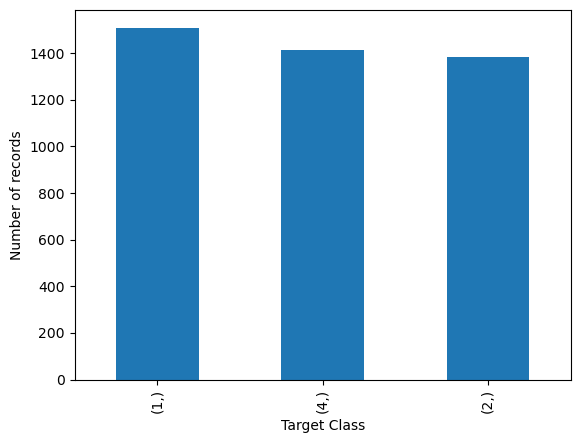

In [9]:
import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

In [10]:
from sklearn.ensemble import RandomForestClassifier
class_rf = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=20)
class_rf.fit(X_train, y_train)

/tmp/ipykernel_20/1327712900.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  class_rf.fit(X_train, y_train)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=20, max_features='auto')

In [11]:
y_pred = class_rf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred, digits=3))

[[255  62  65]
 [ 54 203  81]
 [ 64  74 220]]
              precision    recall  f1-score   support

           1      0.684     0.668     0.675       382
           2      0.599     0.601     0.600       338
           4      0.601     0.615     0.608       358

    accuracy                          0.629      1078
   macro avg      0.628     0.628     0.628      1078
weighted avg      0.630     0.629     0.629      1078



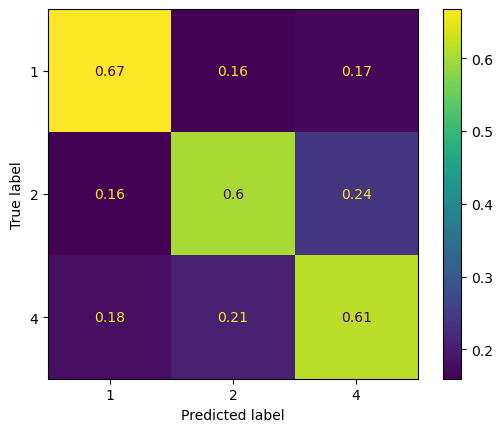

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay.from_estimator(class_rf, X_test, y_test, normalize='true')
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

rf_model= RandomForestClassifier()

parameters = {'n_estimators': [10,100,1000, 1100],
              'bootstrap': [True, False],
              'max_features': [6,32,'auto', 'sqrt'],
              'max_depth': [10, 20, 30, 40, 50],
              'criterion' :['gini', 'entropy']
             }

In [14]:
#grid_search = GridSearchCV(RandomForestClassifier(), parameters, scoring= 'accuracy', refit = 'True', cv = 5)
grid_search = GridSearchCV(estimator=rf_model, param_grid=parameters, cv=5, scoring= 'accuracy', refit = 'True')
grid_search = grid_search.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [15]:
print('best parameters: ')
print(grid_search.best_params_)
rf_best_params = grid_search.best_params_


best parameters: 
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 30, 'max_features': 32, 'n_estimators': 100}


In [16]:
rf_model.set_params(**grid_search.best_params_)
rf_model.fit(X_train, y_train)

pred = rf_model.predict(X_test)

/tmp/ipykernel_20/3224237077.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


In [17]:
grid_search=grid_search.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, grid_search, digits=3))

[[255  62  65]
 [ 54 203  81]
 [ 64  74 220]]
              precision    recall  f1-score   support

           1      0.690     0.688     0.689       382
           2      0.594     0.598     0.596       338
           4      0.608     0.606     0.607       358

    accuracy                          0.633      1078
   macro avg      0.631     0.631     0.631      1078
weighted avg      0.633     0.633     0.633      1078



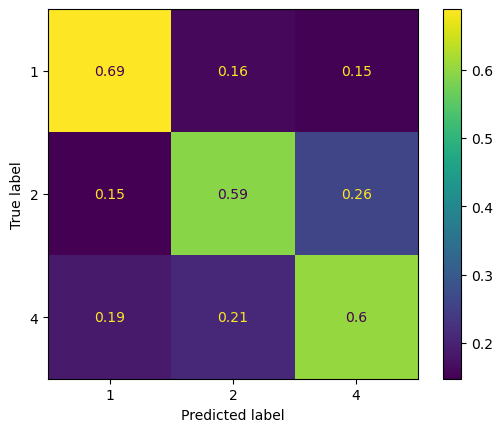

In [18]:
cm = ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, normalize='true')